# Netflix Data Analysis - Kenneth Kuang

The purpose of this analysis is to explore Netflix’s catalog to understand how its content has evolved over time. I will examine how Movies and TV Shows differ in quantity, which countries and ratings dominate, and how the mix of genres has changed across years.
- How Movies and TV Shows differ in quantity and growth.
- What ratings and countries dominate the catalog.
- How Netflix’s genres and releases have changed over time.

### Load, Inspection, and Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix = pd.read_csv("netflix_data.csv")
info = pd.read_csv("show_info.csv")

df = netflix.merge(info, on="show_id", how="inner") 

netflix.info()
info.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8807 non-null   int64 
 1   show_id      8807 non-null   object
 2   title        8807 non-null   object
 3   date_added   8797 non-null   object
 4   duration     8804 non-null   object
 5   listed_in    8807 non-null   object
 6   description  8807 non-null   object
dtypes: int64(1), object(6)
memory usage: 481.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    8807 non-null   int64 
 1   show_id       8807 non-null   object
 2   type          8807 non-null   object
 3   title         8807 non-null   object
 4   director      6173 non-null   object
 5   cast          7982 non-null   object
 6   country       7976 non-nul

,Unnamed: 0_x,show_id,title_x,date_added,duration,listed_in,description,Unnamed: 0_y,type,title_y,director,cast,country,release_year,rating
0,0,s1,Dick Johnson Is Dead,"September 25, 2021",90 min,Documentaries,"As her father nears the end of his life, filmm...",0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13
1,1,s2,Blood & Water,"September 24, 2021",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA
2,2,s3,Ganglands,"September 24, 2021",1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA
3,3,s4,Jailbirds New Orleans,"September 24, 2021",1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA
4,4,s5,Kota Factory,"September 24, 2021",2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA


In [3]:
df.isna().sum().sort_values(ascending=False).head(10)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
Unnamed: 0_x       0
description        0
listed_in          0
show_id            0
dtype: int64

In [4]:
df.describe()

,Unnamed: 0_x,Unnamed: 0_y,release_year
count,8807.000000,8807.000000,8807.000000
mean,4403.000000,4403.000000,2014.180198
std,2542.506244,2542.506244,8.819312
min,0.000000,0.000000,1925.000000
25%,2201.500000,2201.500000,2013.000000
50%,4403.000000,4403.000000,2017.000000
75%,6604.500000,6604.500000,2019.000000
max,8806.000000,8806.000000,2021.000000


**Observations**

### Merge & Organize

In [5]:
df.columns

Index(['Unnamed: 0_x', 'show_id', 'title_x', 'date_added', 'duration',
       'listed_in', 'description', 'Unnamed: 0_y', 'type', 'title_y',
       'director', 'cast', 'country', 'release_year', 'rating'],
      dtype='object')

In [6]:
merged  = netflix.merge(info, on="show_id", how="inner")  
core = merged[["show_id","type","rating","date_added","country","release_year"]]
details = merged[["show_id","duration","listed_in","director","cast","description"]]

merged = merged.drop(columns=["Unnamed: 0_x", "Unnamed: 0_y"]) #I had to drop the two unnamed columns
merged = merged.rename(columns={"title_x": "title"})
merged = merged.drop(columns=["title_y"])

merged.head()

,show_id,title,date_added,duration,listed_in,description,type,director,cast,country,release_year,rating
0,s1,Dick Johnson Is Dead,"September 25, 2021",90 min,Documentaries,"As her father nears the end of his life, filmm...",Movie,Kirsten Johnson,NaN,United States,2020,PG-13
1,s2,Blood & Water,"September 24, 2021",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA
2,s3,Ganglands,"September 24, 2021",1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA
3,s4,Jailbirds New Orleans,"September 24, 2021",1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",TV Show,NaN,NaN,NaN,2021,TV-MA
4,s5,Kota Factory,"September 24, 2021",2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA


**Observations**
- Merging the two datasets let us combine Netflix’s core data with the more detailed information
- I dropped the unnamed columns so that it is easier to do analysis on trends in future sections

### Composition of Catalog

In this section, I will go through the Netflix catalog compsition to see which types, ratings, and countries are most popular on the platform.

In [7]:
# Count categorical values
type_counts = merged["type"].value_counts()
rating_counts = merged["rating"].value_counts()
country_counts = merged["country"].value_counts().head(10)

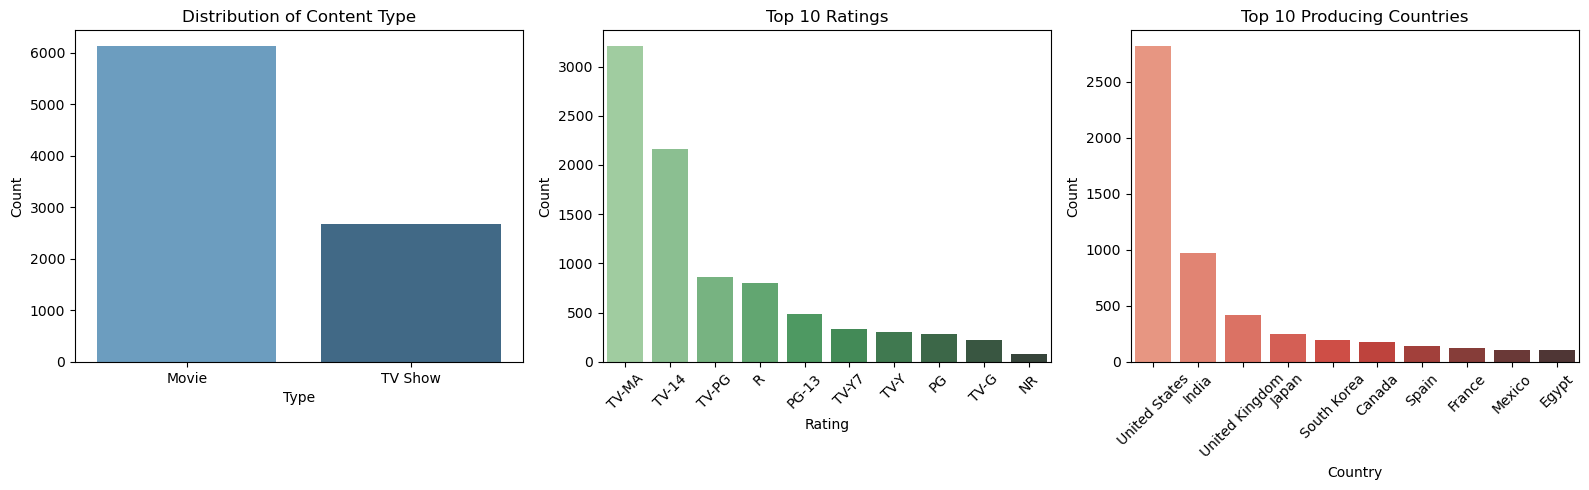

In [8]:
# Bar Charts for Each
fig, axes = plt.subplots(1, 3, figsize=(16,5)) # I found how to make it so that all three plots are right next to each other and smaller, it looks much better

sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette="Blues_d", legend=False, ax=axes[0])
axes[0].set_title("Distribution of Content Type")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Type")

sns.barplot(x=rating_counts.head(10).index, y=rating_counts.head(10).values, hue=rating_counts.head(10).index, palette="Greens_d", legend=False, ax=axes[1])
axes[1].set_title("Top 10 Ratings")
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Rating")
axes[1].tick_params(axis='x', rotation=45) #I learned how to rotate the labels for each bar because they were going over each other and you could not read them

sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette="Reds_d", legend=False, ax=axes[2])
axes[2].set_title("Top 10 Producing Countries")
axes[2].set_ylabel("Count")
axes[2].set_xlabel("Country")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout() # I found this out as well, and I think the square bar charts look better and more compact
plt.show()

**Observations**
- Most titles on Netflix are Movies, but TV Shows still represent a significant portion of the catalog.
- The dominant rating category is TV-MA, suggesting that Netflix’s content skews toward mature audiences.
- The United States leads by a large margin in production, followed by countries like India, United Kingdom, and Japan.
- Netflix has a international presence, but it is still mainly a United States platform

### Handling Missing Data

Before looking at the Netflix catalog, we need to make sure there are no missing values.

In [9]:
merged.isna().sum().sort_values(ascending=False).head(10)

director       2634
country         831
cast            825
date_added       10
rating            4
duration          3
show_id           0
title             0
type              0
description       0
dtype: int64

In [10]:
merged["country"] = merged["country"].fillna("Unknown")
merged["rating"] = merged["rating"].fillna("Unknown")

In [11]:
merged.isna().sum().sort_values(ascending=False).head(10)

director       2634
cast            825
date_added       10
duration          3
show_id           0
title             0
description       0
listed_in         0
type              0
country           0
dtype: int64

**Observations**
- After cleaning, only `director` and `cast` still contain missing data, which is ok because we do not need them for our categorical analysis. 
- By filling missing `country` and `rating` values with `"Unknown"`, we kept every row in the dataset by filling missing values instead of deleting them.

### Encode and Simplify Categories

Columns like `listed_in` and `country`, contain text values that describe multiple categories separated by commas. To make these variables easier to count and visualize, we have to convert them into dummy variables.  

In [12]:
country_split = merged["country"].str.split(",").explode().str.strip() #explode is taking one row with multiple values and turning it into multiple single value rows
#I also split the text and chose the top values 
top_countries = country_split.value_counts().head(10)

In [13]:
for c in top_countries.index:
    merged[f"country_{c.replace(' ', '_')}"] = merged["country"].str.contains(c, na=False).astype(int) #did it for country
    
genre_split = merged["listed_in"].str.split(",").explode().str.strip()
top_genres = genre_split.value_counts().head(10)

In [14]:
for g in top_genres.index:
    merged[f"genre_{g.replace(' ', '_')}"] = merged["listed_in"].str.contains(g, na=False).astype(int) #also did it for listed_in

In [15]:
merged.filter(like="country_").head(3)

,country_United_States,country_India,country_Unknown,country_United_Kingdom,country_Canada,country_France,country_Japan,country_Spain,country_South_Korea,country_Germany
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0


**Observations**
- Creating dummy variables allowed us to change text categories into numerical categories that can be grouped and counted
- 0 or 1 represents whether a show belongs to that category
- This simplifies the complex string data and allows for easier collection when there is visualization or statistical analysis

### Relationships Between Categories

Exploring how different categories on Netflix relate to one another, we can use a crosstab to compare variables such as type and rating. 

rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR,Unknown
type,,,,,,,,,,,,,,,,,,
Movie,1,1,1,41,3,75,287,490,797,1427,126,2062,540,131,139,5,3,2
TV Show,0,0,0,0,0,5,0,0,2,733,94,1145,323,176,195,1,0,2


rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR,Unknown
type,,,,,,,,,,,,,,,,,,
Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.0,0.3,0.1,0.0,0.0,0.0,0.0,0.0
TV Show,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.4,0.1,0.1,0.1,0.0,0.0,0.0


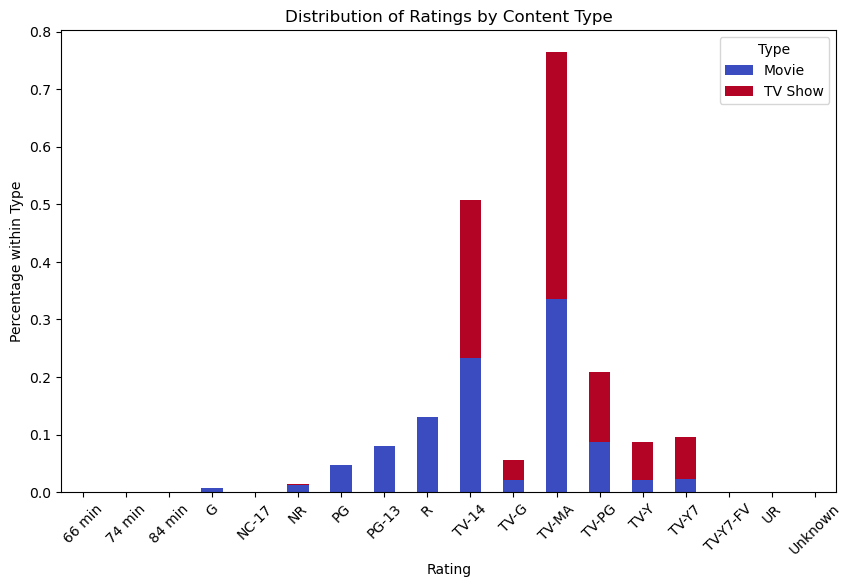

In [16]:
type_rating_ct = pd.crosstab(merged["type"], merged["rating"]) #frequency table of how often two categorical variables intersect.
display(type_rating_ct)

type_rating_norm = pd.crosstab(merged["type"], merged["rating"], normalize='index')
display(type_rating_norm.round(1))

type_rating_norm.T.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm") 
plt.title("Distribution of Ratings by Content Type")
plt.xlabel("Rating")
plt.ylabel("Percentage within Type")
plt.legend(title="Type")
plt.xticks(rotation=45)
plt.show()

**Observations**
- The crosstab shows that TV-MA is the most popular rating in Netflix's catalog across both Movies and TV Shows
- Especially for TV Shows, Movies have a closer distribution across PG, PG-13, and R ratings
- This displays that the Netflix catalog targets mostly adult audiences leaning more towards mature content

### Change Over Time

By converting the date_added column to a datetime format, we can group data by year and type

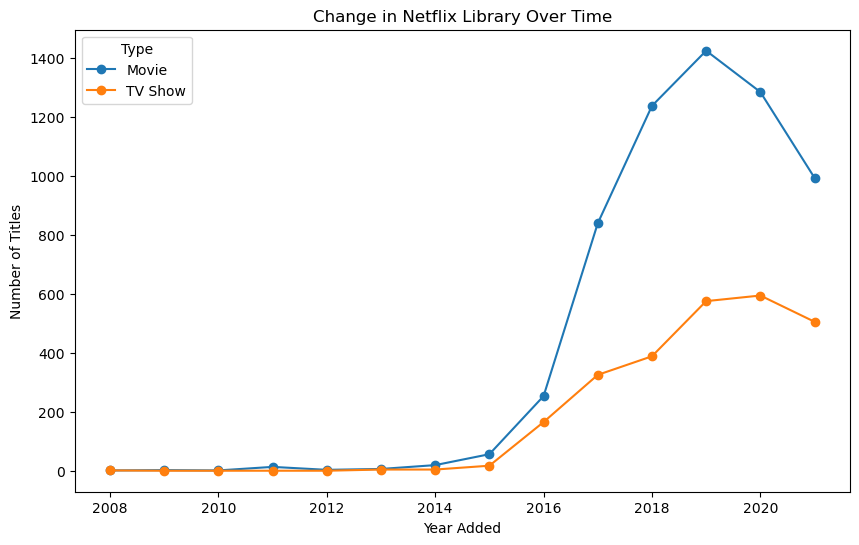

In [17]:
merged["date_added"] = pd.to_datetime(merged["date_added"], errors="coerce")

# Extract year and month
merged["year_added"] = merged["date_added"].dt.year
merged["month_added"] = merged["date_added"].dt.month

titles_by_year = merged.groupby(["year_added", "type"]).size().unstack(fill_value=0) #group by year

titles_by_year.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Change in Netflix Library Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="Type")
plt.show()

**Observations**
- The plot shows that there was a huge boost in Titles in 2015, having a steep increase in both movies and shows
- Movies peaked in 2019, while shows were still growing in that period
- The decline after 2020 was most likely due to the pandemic and production delays
- Overall, the data displays slower growth after the pandemic, but it is still shifting towards more shows rather than movies 

### Outliers or Interesting Patterns

To find anomalies in Netflix’s catalog, we have to look for titles with unusually long durations or many seasons.  

In [18]:
movies = merged[merged["type"] == "Movie"].copy()
shows = merged[merged["type"] == "TV Show"].copy()

#converting movies duration to minutes and shows duration to seasons
movies["duration_min"] = movies["duration"].str.replace(" min", "").astype(float)
shows["seasons"] = shows["duration"].str.replace(" Season", "").str.replace("s", "").astype(float)

#finding the anomalies
longest_movie = movies.loc[movies["duration_min"].idxmax(), ["title", "duration_min", "country", "release_year"]]
most_seasons = shows.loc[shows["seasons"].idxmax(), ["title", "seasons", "country", "release_year"]]

print("Longest Movie:")
display(longest_movie)

print("Show with Most Seasons:")
display(most_seasons)


Longest Movie:


title           Black Mirror: Bandersnatch
duration_min                         312.0
country                      United States
release_year                          2018
Name: 4253, dtype: object

Show with Most Seasons:


title           Grey's Anatomy
seasons                   17.0
country          United States
release_year              2020
Name: 548, dtype: object

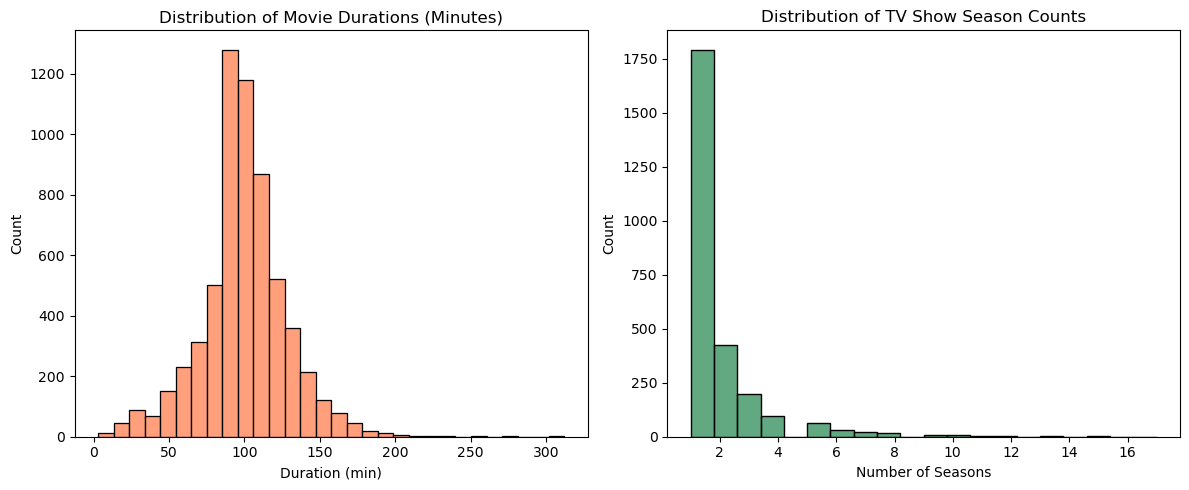

In [19]:
#2 plots to show what the normal distribution of movie durations are, and also average season length
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(movies["duration_min"].dropna(), bins=30, ax=axes[0], color="coral")
axes[0].set_title("Distribution of Movie Durations (Minutes)")
axes[0].set_xlabel("Duration (min)")
axes[0].set_ylabel("Count")

sns.histplot(shows["seasons"].dropna(), bins=20, ax=axes[1], color="seagreen") #I like how I can use crazy colors for the plots
axes[1].set_title("Distribution of TV Show Season Counts")
axes[1].set_xlabel("Number of Seasons")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Observations**
- The histogram of movie durations shows that most Netflix movies are between 80 and 120 minutes long
- The longest movie in the dataset Black Mirror: Bandersnatch runs 312 minutes, a clear anomaly compared to the rest
- Most series have 1–3 seasons, so really long shows such as Grey's Anatomy stands out
- This confirms that Netflix has normal sized movies and shows, with some exceptions

### Key Visualizations

##### Plot 1: Ratings by type(Movies and Shows) 

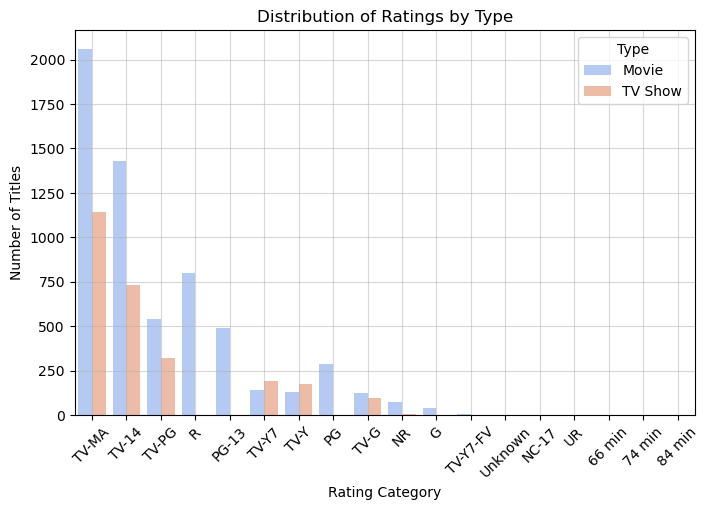

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=merged, x="rating", hue="type", order=merged["rating"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Ratings by Type")
plt.xlabel("Rating Category")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.grid(alpha=0.5)
plt.show()

**Observations**
- Most TV Shows and Movies are TV-MA, but Movies have higher rates of TV-14 or PG-13
- This once again confirms Netflix's focus on more mature content

##### Plot 2: Netflix Titles Added per Year

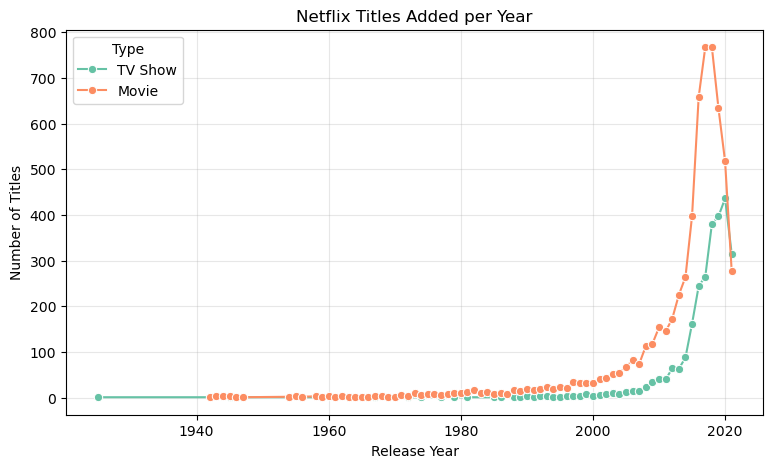

In [21]:
titles_per_year = merged.groupby(["release_year", "type"]).size().reset_index(name="count")

plt.figure(figsize=(9,5))
sns.lineplot(data=titles_per_year, x="release_year", y="count", hue="type", marker="o", palette="Set2")
plt.title("Netflix Titles Added per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(alpha=0.3)
plt.legend(title="Type")
plt.show()

**Observations**
- Steep growth after 2015 shows Netflix’s global expansion.
- Both movies and shows peak around 2019, then decline due to production delays during the pandemic.

##### Plot 3: U.S. vs Non-U.S. Content

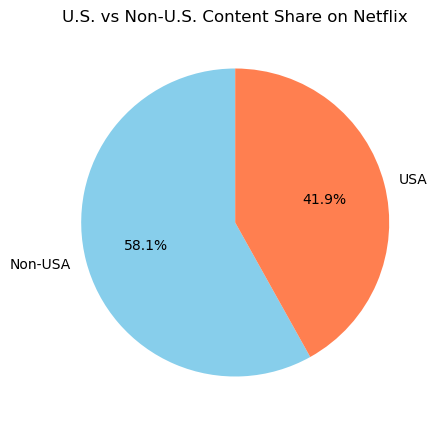

In [22]:
merged["is_USA"] = merged["country"].apply(lambda x: "USA" if "United States" in str(x) else "Non-USA")
country_counts = merged["is_USA"].value_counts(normalize=True) * 100 #This *100 converts the decimal to a percent

plt.figure(figsize=(5,5))
plt.pie(country_counts, labels=country_counts.index, autopct="%.1f%%", startangle=90, colors=["skyblue", "coral"])
plt.title("U.S. vs Non-U.S. Content Share on Netflix")
plt.show()

**Observations**
- 41.9% of Netflix titles come from the United States, showing that while the platform remains U.S. heavy, international productions now make up the majority of its content diversity.

#### These visualizations collectively show how Netflix evolved from a mostly U.S.-based movie distributor to a diverse global streaming platform emphasizing original series.

### Conclusion

- Netflix’s catalog is primarily composed of movies, though TV shows have grown steadily and the gap is getting smaller
- Ratings are dominated by TV-MA, reflecting Netflix’s strong focus on mature content for older audiences
- Catalog growth accelerated sharply between 2015–2019, coinciding with Netflix’s global expansion and investment in original content
- Post-2020 was most likely due to the pandemic and how it affected production delays
- U.S. titles still represent a large portion, but international content especially from India, the U.K., and South Korea has expanded significantly
- Most movies run 80–120 minutes, while most TV shows last 1–3 seasons; only a few long-running series stand out as outliers
- Cast and Director information is missing which can restrict some analysis.